In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size']=20
#import numba

In [2]:

def RMT_Poi(N, sigma):
    H=np.zeros((N, N))
    for j in range(N):
        H[j,j]=np.random.normal(0, sigma, 1)
    return H

def RMT_GOE(N, sigma):
    H=np.zeros((N, N))
    for j in range(N):
        for k in range(j, N):
            H[j,k]=np.random.normal(0,sigma, 1)
            H[k,j]=H[j,k]
    return H

def RMT_GUE(N, sigma):
    H=np.zeros((N, N), dtype='complex')
    for j in range(N):
        H[j,j]=np.random.normal(0,sigma, 1)
        for k in range(j+1, N):
            a=np.random.normal(0,sigma, 1)/np.sqrt(2)
            b=np.random.normal(0,sigma, 1)/np.sqrt(2)
            H[j,k]=complex(a,b)
            H[k,j]=complex(a,-b)
    return H

In [3]:
N = 3000
i=complex(0,1)
#auxH = np.random.randn(N,N)
#H=(auxH+auxH.T)/2
#auxH=np.random.randn(N, N)+i*np.random.randn(N, N)
#H=(auxH+auxH.conj().T)/2
H_Poi=RMT_Poi(N,1/np.sqrt(2))
E_Poi , _ = np.linalg.eigh(H_Poi)
H_GOE=RMT_GOE(N,1/np.sqrt(2))
E_GOE , _ = np.linalg.eigh(H_GOE)
H_GUE=RMT_GUE(N,1/np.sqrt(2))
E_GUE , _ = np.linalg.eigh(H_GUE)

In [29]:
"""R=np.sqrt(2*N)
x=np.linspace(-R, R, 200)
plt.figure()
plt.hist(E, bins=100, density=True)
plt.plot(x, 2/(np.pi*R)*np.sqrt(1-(x/R)**2))
plt.show()"""

'R=np.sqrt(2*N)\nx=np.linspace(-R, R, 200)\nplt.figure()\nplt.hist(E, bins=100, density=True)\nplt.plot(x, 2/(np.pi*R)*np.sqrt(1-(x/R)**2))\nplt.show()'

In [5]:
def unfoldSpectrum(E, order, n_bins):
    Emax=np.max(E)
    Emin=np.min(E)
    rhoE, bins=np.histogram(E, bins=np.linspace(Emin, Emax, n_bins+1), density='True')
    bins=bins[:-1]
    N_E=np.zeros(n_bins)
    dummyE=0
    dE=(bins[1]-bins[0])
    for k in range(n_bins):
        dummyE+=rhoE[k]*dE
        N_E[k]=dummyE
    fit=np.polyfit(bins, N_E, order)
    polyn=np.poly1d(fit)
    unf_E=N*polyn(E)
    rhoE_unf, bins=np.histogram(unf_E, bins=np.linspace(np.min(unf_E), np.max(unf_E), n_bins+1), density='True')
    stdrho=np.std(rhoE_unf)
    ndiscard=np.sum(rhoE_unf>1/N+2*stdrho) # # bins with ρ(E)>1/N+2σ. # bins to discard
    unf_E=unf_E[unf_E>bins[ndiscard]]
    unf_E=unf_E[unf_E<bins[-1-ndiscard]]
    return unf_E

In [7]:
order_polyn=10
n_bins=70
unf_E_Poi=unfoldSpectrum(E_Poi, order_polyn, n_bins)
unf_E_GOE=unfoldSpectrum(E_GOE, order_polyn, n_bins)
unf_E_GUE=unfoldSpectrum(E_GUE, order_polyn, n_bins)
"""plt.figure()
plt.hist(unf_E, bins=np.linspace(np.min(unf_E), np.max(unf_E), n_bins-1))
plt.show()"""

'plt.figure()\nplt.hist(unf_E, bins=np.linspace(np.min(unf_E), np.max(unf_E), n_bins-1))\nplt.show()'

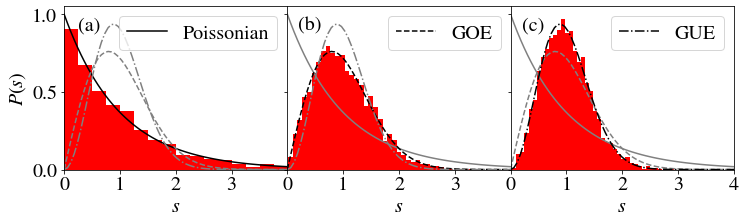

In [34]:
s=np.linspace(0, 6, 100)
fig, (ax1, ax2, ax3)=plt.subplots(1, 3, sharey=True, figsize=[12, 3])
ax1.plot(s, np.exp(-s), color='black', label="Poissonian")
ax1.plot(s, np.pi*s*0.5*np.exp(-np.pi*s**2/4), color='gray', ls='--')
ax1.plot(s, 32*s**2/np.pi**2*np.exp(-4*s**2/np.pi), color='gray', ls='-.')
ax1.hist(np.diff(unf_E_Poi),bins=40, density='True', color='red')
ax2.plot(s, np.exp(-s), color='gray')
ax2.plot(s, np.pi*s*0.5*np.exp(-np.pi*s**2/4), color='black', ls='--', label="GOE")
ax2.plot(s, 32*s**2/np.pi**2*np.exp(-4*s**2/np.pi), color='gray', ls='-.')
ax2.hist(np.diff(unf_E_GOE),bins=40, density='True', color='red')
ax3.plot(s, np.exp(-s), color='gray')
ax3.plot(s, np.pi*s*0.5*np.exp(-np.pi*s**2/4), color='gray', ls='--')
ax3.plot(s, 32*s**2/np.pi**2*np.exp(-4*s**2/np.pi), color='black', ls='-.', label="GUE")
ax3.hist(np.diff(unf_E_GUE),bins=40, density='True', color='red')
plt.subplots_adjust(wspace=0)
#plt.hist(np.diff(E), bins="auto", density='True')
#print(np.average(np.diff(unf_E)))
ax1.set_xlim(0,4)
ax2.set_xlim(0,4)
ax3.set_xlim(0,4)
ax1.set_xticks([0, 1,2, 3])
ax2.set_xticks([0, 1,2, 3])
ax3.set_xticks([0, 1,2, 3, 4])
ax1.set_xlabel("$s$")
ax2.set_xlabel("$s$")
ax3.set_xlabel("$s$")
ax1.set_ylabel("$P(s)$")
ax1.text(0.25, 0.9, "(a)")
ax2.text(0.2, 0.9, "(b)")
ax3.text(0.2, 0.9, "(c)")
ax1.legend(labelspacing=0)
ax2.legend(labelspacing=0)
ax3.legend(labelspacing=0)
plt.show()